In [1]:
import drag_functions_turb as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from time_TvsR import *
import scipy.optimize as opt
import os
import sys
from matplotlib.patches import Circle

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=3)
colors = ['#4D4D4D','#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0','#B2912F','#B276B2','#DECF3F','#F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

# Gap Opening Limits from Kratter et al. (2010) paper

[  1.09983346e-02   1.42416493e-02   1.84412456e-02   2.38789825e-02
   3.09197301e-02   4.00357723e-02   5.18383547e-02   6.71184465e-02
   8.68993774e-02   1.12504751e-01   1.45460682e-01   1.88294993e-01
   2.43407722e-01   3.14609821e-01   4.06052312e-01   5.23288040e-01
   6.74177979e-01   8.66222153e-01   1.11338810e+00   1.43052111e+00
   1.83658336e+00   2.35565899e+00   3.01787268e+00   3.86066769e+00
   4.93026990e+00   6.28336467e+00   7.99968001e+00   1.01447827e+01
   1.28460895e+01   1.61971255e+01   2.03900450e+01   2.55960496e+01
   3.20474907e+01   4.00876343e+01   4.99752924e+01   6.22850697e+01
   7.75220945e+01   9.63827766e+01   1.20069045e+02   1.49479714e+02
   1.86529068e+02   2.33005558e+02   2.90569977e+02   3.62771569e+02
   4.52260611e+02   5.63721832e+02   7.03596319e+02   8.76869621e+02
   1.09432829e+03   1.36371683e+03]


[1e-06, 0.01, 0, 100]

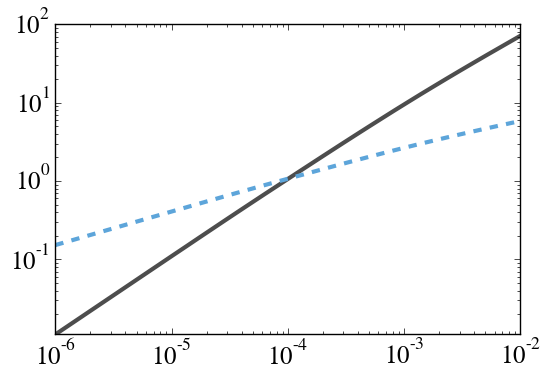

In [4]:
a_max_arr = np.loadtxt('../txt_files/a_max_arr')
alphas = np.logspace(-6,-0.5,num=50)
a_arr = a_max_arr[0]
a_arr_st1 = a_max_arr[1]
T_arr = 120.*a_max_arr**(-3./7.)
sig_0_arr = 2000*a_max_arr**(-1.)

m_starve_arr = 8.*alphas/4.0e-4*T_arr/40.*a_max_arr/70.
m_starve_arr_ec = 1.50267*(a_max_arr/70.)**(9./7.)*(T_arr/40.)**(15./14.)*(sig_0_arr/3.)**(3./7.)*(alphas/4e-4)**(3./7.)
plt.loglog(alphas,m_starve_arr[0])
plt.loglog(alphas,m_starve_arr_ec[0],linestyle='dashed')

print m_starve_arr[0]
# plt.loglog(alphas,m_starve_arr[1])

# plt.semilogx(alphas,m_starve_arr[1])

plt.axis([1e-6,1e-2,0,100])

In [6]:
alphs = [1e-4,1e-3,1e-2]
m_starve_cons = np.zeros((len(alphs),2,len(alphas)))

for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_max_arr/70.


fig = plt.figure(1,figsize = (7,7))

# plt.subplot(121)

plt.semilogy(a_max_arr[0],m_starve_arr[0],zorder=10)


for i in range(len(alphs)):
    ind = np.where(m_starve_arr[0]<m_starve_cons[i,0])[0][-1]+1
    line, = plt.semilogy(a_max_arr[0,ind:],m_starve_cons[i,0,ind:],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
    
a_iso = np.linspace(a_max_arr[0,-1],a_max_arr[0,0],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

plt.xlabel("a (AU)")
plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)

ax = plt.gca()
ax.text(30,0.35,r'$\alpha = 10^{-4}$')
ax.text(30,3.4,r'$\alpha = 10^{-3}$')
ax.text(22,30.4,r'$\alpha = 10^{-2}$')
ax.text(66,600,r'$M_{iso}$',fontsize=20)
ax.text(23,600,r'$M_{max}$',fontsize=20)

# plt.gca().legend(loc='best',fancybox=True)

# plt.subplot(212)

# plt.semilogy(a_max_arr[1],m_starve_arr[1])

# for i in range(len(alphs)):
#     ind = np.where(m_starve_arr[1]<m_starve_cons[i,1])[0][-1]+1
#     plt.semilogy(a_max_arr[1],m_starve_cons[i,1],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
# iso_arr = 400.*(a_max_arr[1]/70.)**(6./5.)
# ind = np.where(m_starve_arr[1]<iso_arr)[0][-1]+1
# plt.semilogy(a_max_arr[1,ind:],iso_arr[ind:],label=r"$M_{iso}$",linestyle='dashed')

# plt.xlabel("a (AU)")
# plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 1$",y=1.02)

# plt.tight_layout()

ValueError: operands could not be broadcast together with shapes (1000,) (2,50) 

In [70]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/figures/m_starve_lim.pdf')

## Make version of the figure where the pebble accretion mass isn't taken into account

In [3]:
alphs = [1e-4,1e-3,1e-2]
m_starve_cons = np.zeros((len(alphs),len(a_arr)))
m_starve_cons_2 = np.zeros((len(alphs),len(a_arr)))

a_arr = np.linspace(10,90,num=1000)
T_arr = 120.*a_arr**(-3./7.)

for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_arr/70.
    m_starve_cons_2[i] = 1.50267*(a_arr/70.)**(9./7.)*(T_arr/40.)**(15./14.)*(sig_0_arr/3.)**(3./7.)*(alph/4e-4)**(3./7.)



fig = plt.figure(1,figsize = (7,7))

# plt.subplot(121)

# plt.semilogy(a_max_arr[0],m_starve_arr[0],zorder=10)


for i in range(len(alphs)):
    line, = plt.semilogy(a_arr,m_starve_cons[i],linestyle='dashed')
    plt.semilogy(a_arr,m_starve_cons_2[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]),color=line.get_color())
    
    
a_iso = np.linspace(a_arr[0],a_arr[-1],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

plt.xlabel("a (AU)")
plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)

ax = plt.gca()
ax.text(75,0.6,r'$\alpha = 10^{-4}$')
ax.text(75,1.5,r'$\alpha = 10^{-3}$')
ax.text(75,4.4,r'$\alpha = 10^{-2}$')
ax.text(66,600,r'$M_{iso}$',fontsize=20)
# ax.text(23,600,r'$M_{max}$',fontsize=20)

# plt.gca().legend(loc='best',fancybox=True)

# plt.subplot(212)

# plt.semilogy(a_max_arr[1],m_starve_arr[1])

# for i in range(len(alphs)):
#     ind = np.where(m_starve_arr[1]<m_starve_cons[i,1])[0][-1]+1
#     plt.semilogy(a_max_arr[1],m_starve_cons[i,1],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
# iso_arr = 400.*(a_max_arr[1]/70.)**(6./5.)
# ind = np.where(m_starve_arr[1]<iso_arr)[0][-1]+1
# plt.semilogy(a_max_arr[1,ind:],iso_arr[ind:],label=r"$M_{iso}$",linestyle='dashed')

# plt.xlabel("a (AU)")
# plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 1$",y=1.02)

# plt.tight_layout()

NameError: name 'a_arr' is not defined

In [26]:
fig.savefig('../../UCSC_Qual/M_starve_gap_2.pdf')

In [5]:
alphs = [1e-4,1e-3,1e-2]
m_starve_cons = np.zeros((len(alphs),len(a_arr)))
m_starve_cons_2 = np.zeros((len(alphs),len(a_arr)))

a_arr = np.linspace(10,90,num=1000)
T_arr = 120.*a_arr**(-3./7.)

for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_arr/70.
    m_starve_cons_2[i] = 1.50267*(a_arr/70.)**(9./7.)*(T_arr/40.)**(15./14.)*(sig_0_arr/3.)**(3./7.)*(alph/4e-4)**(3./7.)



fig = plt.figure(1,figsize = (7,7))

# plt.subplot(121)

# plt.semilogy(a_max_arr[0],m_starve_arr[0],zorder=10)


for i in range(len(alphs)):
#     line, = plt.semilogy(a_arr,m_starve_cons[i],linestyle='dashed')
    plt.semilogy(a_arr,m_starve_cons_2[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
    
a_iso = np.linspace(a_arr[0],a_arr[-1],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

plt.xlabel("a (AU)")
plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)

ax = plt.gca()
ax.text(75,0.6,r'$\alpha = 10^{-4}$')
ax.text(75,1.5,r'$\alpha = 10^{-3}$')
ax.text(75,4.4,r'$\alpha = 10^{-2}$')
ax.text(66,600,r'$M_{iso}$',fontsize=20)
# ax.text(23,600,r'$M_{max}$',fontsize=20)

# plt.gca().legend(loc='best',fancybox=True)

# plt.subplot(212)

# plt.semilogy(a_max_arr[1],m_starve_arr[1])

# for i in range(len(alphs)):
#     ind = np.where(m_starve_arr[1]<m_starve_cons[i,1])[0][-1]+1
#     plt.semilogy(a_max_arr[1],m_starve_cons[i,1],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
# iso_arr = 400.*(a_max_arr[1]/70.)**(6./5.)
# ind = np.where(m_starve_arr[1]<iso_arr)[0][-1]+1
# plt.semilogy(a_max_arr[1,ind:],iso_arr[ind:],label=r"$M_{iso}$",linestyle='dashed')

# plt.xlabel("a (AU)")
# plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 1$",y=1.02)

# plt.tight_layout()

ValueError: could not broadcast input array from shape (1000) into shape (50)

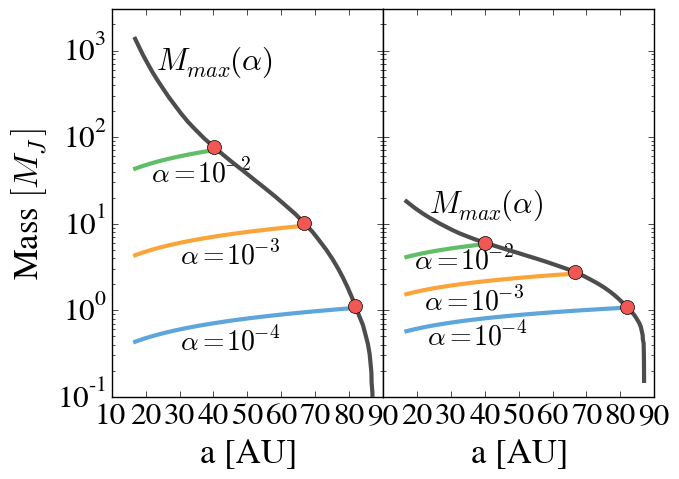

In [9]:
alphs = [1e-4,1e-3,1e-2]
m_starve_cons = np.zeros((len(alphs),2,len(alphas)))
m_starve_cons_ec = np.zeros((len(alphs),2,len(alphas)))

for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_max_arr/70.
    m_starve_cons_ec[i] =  1.50267*(a_arr/70.)**(9./7.)*(T_arr/40.)**(15./14.)*(sig_0_arr/3)**(3./7.)*(alph/4e-4)**(3./7.)

# fig = plt.figure(1,figsize = (10,6))
f, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(7,5))
f.subplots_adjust(wspace=0)

# ax1 = plt.subplot(121)

ax1.semilogy(a_max_arr[0],m_starve_arr[0],zorder=10)

for i in range(len(alphs)):
    ind = np.where(m_starve_arr[0]<m_starve_cons[i,0])[0][-1]+1
    line, = ax1.semilogy(a_max_arr[0,ind:],m_starve_cons[i,0,ind:],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    ax1.plot(a_max_arr[0,ind],m_starve_arr[0,ind],linestyle=' ',marker='o',zorder=20,markersize=10,color=colors[-1])

    
a_iso = np.linspace(a_max_arr[0,-1],a_max_arr[0,0],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
# plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

ax1.set_xlabel("a [AU]",fontsize=25)
ax1.set_ylabel("Mass $[M_J]$",fontsize=25)
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)


ax1.text(30,0.35,r'$\alpha = 10^{-4}$',fontsize=20)
ax1.text(30,3.4,r'$\alpha = 10^{-3}$',fontsize=20)
ax1.text(21.5,30.4,r'$\alpha = 10^{-2}$',fontsize=20)
ax1.text(23,600,r'$M_{max}(\alpha)$',fontsize=22.5)

ax1.tick_params(labelsize=22.5)


# plt.subplot(122,sharey=ax1)
ax2.semilogy(a_max_arr[0],m_starve_arr_ec[0],zorder=11)

for i in range(len(alphs)):
    ind_ec = np.where(m_starve_arr_ec[0]<m_starve_cons_ec[i,0])[0][-1]+1
    ax2.semilogy(a_max_arr[0,ind_ec:],m_starve_cons_ec[i,0,ind_ec:])
    ax2.plot(a_max_arr[0,ind_ec],m_starve_arr_ec[0,ind_ec],linestyle=' ',marker='o',zorder=20,markersize=10,color=colors[-1])

a_iso = np.linspace(a_max_arr[0,-1],a_max_arr[0,0],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
# plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

ax2.set_xlabel("a [AU]",fontsize=25)
# plt.ylabel("Mass $[M_J]$",fontsize=25)
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)

# ax = plt.gca()
ax2.text(23,0.40,r'$\alpha = 10^{-4}$',fontsize=20)
ax2.text(22,1.0,r'$\alpha = 10^{-3}$',fontsize=20)
ax2.text(19.0,3.0,r'$\alpha = 10^{-2}$',fontsize=20)
ax2.text(23.5,13.5,r'$M_{max}(\alpha)$',fontsize=22)

x = [20,30,40,50,60,70,80,90]
labels = [20,30,40,50,60,70,80,90]
plt.xticks(x, labels)

ax2.tick_params(labelsize=22.5)
# plt.gca().legend(loc='best',fancybox=True)

# plt.subplot(212)

# plt.semilogy(a_max_arr[1],m_starve_arr[1])

# for i in range(len(alphs)):
#     ind = np.where(m_starve_arr[1]<m_starve_cons[i,1])[0][-1]+1
#     plt.semilogy(a_max_arr[1],m_starve_cons[i,1],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
# iso_arr = 400.*(a_max_arr[1]/70.)**(6./5.)
# ind = np.where(m_starve_arr[1]<iso_arr)[0][-1]+1
# plt.semilogy(a_max_arr[1,ind:],iso_arr[ind:],label=r"$M_{iso}$",linestyle='dashed')

# plt.xlabel("a (AU)")
# plt.ylabel("Mass $(M_J)$")
# plt.title(r"$St_{max} = 1$",y=1.02)

# plt.tight_layout()

In [56]:
f.savefig('../../Paper_Prep/Gas_Assisted_Growth/figures/m_starve_lim_4.pdf')

## Original version of Paper II Plot

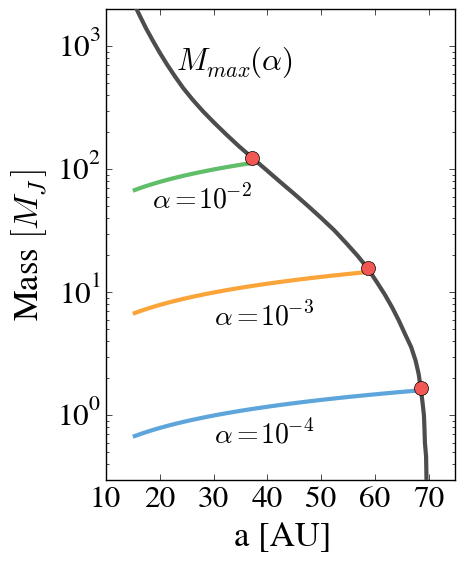

In [5]:
alphs = [1e-4,1e-3,1e-2]
a_max_arr = np.loadtxt('../txt_files/rev_a_max_st_max_1e-1')
# a_max_arr = np.loadtxt('../txt_files/a_max_arr')
alphas = np.logspace(-6,-0.5,num=50)
a_arr = a_max_arr[0]
a_arr_st1 = a_max_arr[1]
T_arr = 200.*a_arr**(-3./7.)
sig_0_arr = 500.*a_max_arr**(-1.)

m_starve_arr = 8.*alphas/4.0e-4*T_arr/40.*a_arr/70.
m_starve_cons = np.zeros((len(alphs),len(alphas)))


for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_arr/70.

fig = plt.figure(1,figsize = (5,6))
ax1 = plt.gca()
# ax1 = plt.subplot(121)

ax1.semilogy(a_arr,m_starve_arr,zorder=10)

for i in range(len(alphs)):
    ind = np.where(m_starve_arr<m_starve_cons[i])[0][-1]+1
    line, = ax1.semilogy(a_arr[ind:],m_starve_cons[i,ind:],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    ax1.plot(a_arr[ind],m_starve_arr[ind],linestyle=' ',marker='o',zorder=20,markersize=10,color=colors[-1])

ax1.set_xlabel("a [AU]",fontsize=25)
ax1.set_ylabel("Mass $[M_J]$",fontsize=25)
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)


ax1.text(30,0.60,r'$\alpha = 10^{-4}$',fontsize=20)
ax1.text(30,5.5,r'$\alpha = 10^{-3}$',fontsize=20)
ax1.text(18.5,49,r'$\alpha = 10^{-2}$',fontsize=20)
ax1.text(23,650,r'$M_{max}(\alpha)$',fontsize=22.5)

ax1.tick_params(labelsize=22.5)
plt.axis([10,75,3e-1,2e3])

plt.tight_layout()

In [51]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper2_submit/rev_m_star_lim_sng.pdf')

## Version with gray region

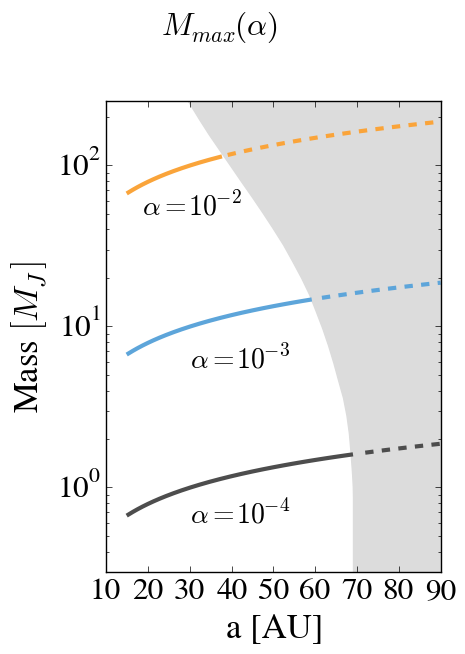

In [29]:
alphs = [1e-4,1e-3,1e-2]
a_max_arr = np.loadtxt('../txt_files/rev_a_max_st_max_1e-1')
# a_max_arr = np.loadtxt('../txt_files/a_max_arr')
alphas = np.logspace(-6,-0.5,num=50)
a_arr = a_max_arr[0]
a_arr_st1 = a_max_arr[1]
T_arr = 200.*a_arr**(-3./7.)
sig_0_arr = 500.*a_max_arr**(-1.)

m_starve_arr = 8.*alphas/4.0e-4*T_arr/40.*a_arr/70.
m_starve_cons = np.zeros((len(alphs),len(alphas)))


for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_arr/70.

fig = plt.figure(1,figsize = (5,6))
ax1 = plt.gca()
# ax1 = plt.subplot(121)

for i in range(len(alphs)):
    ind = np.where(m_starve_arr<m_starve_cons[i])[0][-1]+1
    line, = ax1.semilogy(a_arr[ind:],m_starve_cons[i,ind:],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    
    ext = np.linspace(a_arr[ind]*1.05,90)
    T_ext = 200.*ext**(-3./7.)
    m_ext = 8.*alphs[i]/4.0e-4*T_ext/40.*ext/70.
    
    ax1.semilogy(ext,m_ext,linestyle='dashed',color=line.get_color())
#     ax1.semilogy(a_arr[:ind],m_starve_cons[i,:ind],linestyle='dashed',color=line.get_color())

plt.fill_between(a_arr,m_starve_arr,1e4,color='#DCDCDC')

plt.axvspan(69,90,0,1e4,color='#DCDCDC')
ax1.set_xlabel("a [AU]",fontsize=25)
ax1.set_ylabel("Mass $[M_J]$",fontsize=25)
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)


ax1.text(30,0.60,r'$\alpha = 10^{-4}$',fontsize=20)
ax1.text(30,5.5,r'$\alpha = 10^{-3}$',fontsize=20)
ax1.text(18.5,49,r'$\alpha = 10^{-2}$',fontsize=20)
ax1.text(23,650,r'$M_{max}(\alpha)$',fontsize=22.5)

ax1.tick_params(labelsize=22.5)
plt.axis([10,90,3e-1,2.5e2])

plt.tight_layout()

In [30]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper2_submit/rev_m_star_lim_grey.pdf')

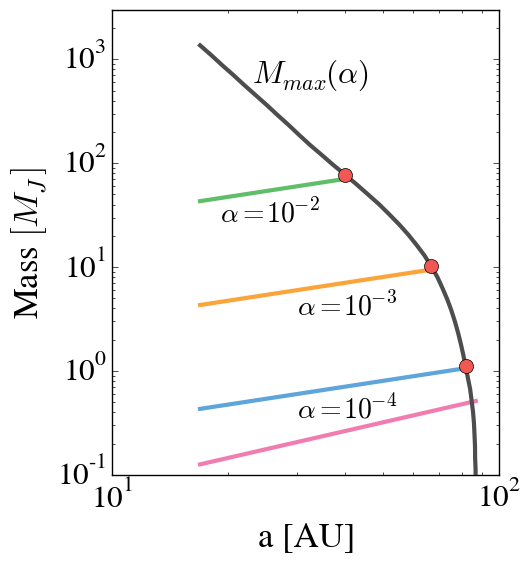

In [8]:
alphs = [1e-4,1e-3,1e-2]
m_starve_cons = np.zeros((len(alphs),2,len(alphas)))
m_starve_cons_ec = np.zeros((len(alphs),2,len(alphas)))

for i,alph in enumerate(alphs):
    m_starve_cons[i] = 8.*alph/4.0e-4*T_arr/40.*a_max_arr/70.
    m_starve_cons_ec[i] =  1.50267*(a_arr/70.)**(9./7.)*(T_arr/40.)**(15./14.)*(sig_0_arr/3)**(3./7.)*(alph/4e-4)**(3./7.)

f = plt.figure(1,figsize = (5,6))

ax1 = plt.gca()

ax1.semilogy(a_max_arr[0],m_starve_arr[0],zorder=10)

for i in range(len(alphs)):
    ind = np.where(m_starve_arr[0]<m_starve_cons[i,0])[0][-1]+1
    line, = ax1.semilogy(a_max_arr[0,ind:],m_starve_cons[i,0,ind:],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphs[i]))
    ax1.plot(a_max_arr[0,ind],m_starve_arr[0,ind],linestyle=' ',marker='o',zorder=20,markersize=10,color=colors[-1])

    
a_iso = np.linspace(a_max_arr[0,-1],a_max_arr[0,0],num=15)
iso_arr = 400.*(a_iso/70.)**(6./5.)
# ind = np.where(m_starve_arr[0]<iso_arr)[0][-1]+1
# plt.semilogy(a_iso,iso_arr,label=r"$M_{iso}$",linestyle=' ',marker='o',zorder=11)

ax1.set_xlabel("a [AU]",fontsize=25)
ax1.set_ylabel("Mass $[M_J]$",fontsize=25)
# plt.title(r"$St_{max} = 0.1$",y=1.02)

plt.ylim(1e-1,3e3)


ax1.text(30,0.35,r'$\alpha = 10^{-4}$',fontsize=20)
ax1.text(30,3.4,r'$\alpha = 10^{-3}$',fontsize=20)
ax1.text(19.0,27,r'$\alpha = 10^{-2}$',fontsize=20)
ax1.text(23,600,r'$M_{max}(\alpha)$',fontsize=22.5)

ax1.tick_params(labelsize=22.5)

plt.loglog(a_max_arr[0],np.sqrt(3)*2.05/318.*a_max_arr[0]**(6./7.))


In [18]:
f.savefig('../../Paper_Prep/Gas_Assisted_Growth/figures/m_starve_lim_sng.pdf')

# Gap opening mass calculation attempt from Eugene's Paper

In [7]:
m_star = 1.*fn.m_sun
m_j = 317.828*fn.m_earth
m_p = 0.1*m_j
rho_p = 1.2457
r_p = (3*m_p/(4.*np.pi*rho_p))**(1./3.)
v_esc = np.sqrt(2*fn.G*m_p/r_p)
print "m_p = %.5g" %m_j
print "r_jup = %.5g" %r_p
print "v_esc = %.5g" %v_esc

alpha = 1e-3
A = np.logspace(0,2,num=1000)
T = 120*A**(-3./7.)
cs = np.sqrt(fn.k*T/fn.mu)
sig_0 = 1700*A**(-3./2.)
omega = np.sqrt(fn.G*m_star/(A*fn.au)**3.)
h = cs/omega

r_h = (A*fn.au)*(m_p/3./m_star)**(1./3.)
r_b = fn.G*m_p/cs**2.

q = m_p/(m_star)
v_gap = 1.5*q**2./(h/(A*fn.au))**4.*cs
v_r = 1.5*alpha*cs*h/(A*fn.au)
v_shear = omega*r_h

m_p = 1.8993e+30
r_jup = 3.3141e+09
v_esc = 2.7655e+06


## Show that $R_b \gg R_h$

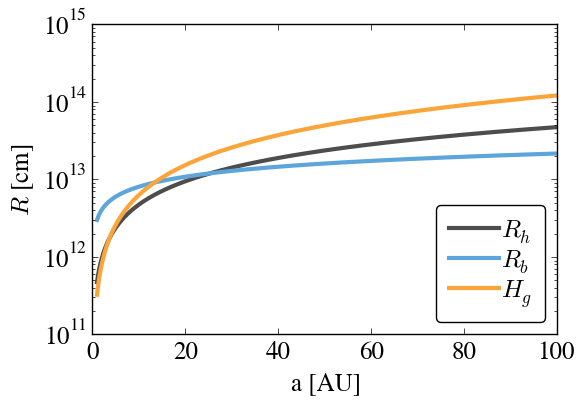

In [29]:
plt.semilogy(A,r_h,label=r'$R_h$')
plt.semilogy(A,r_b,label=r'$R_b$')
plt.semilogy(A,h,label=r'$H_g$')


plt.gca().legend(loc='best',fancybox=True)
plt.xlabel("a [AU]")
plt.ylabel(r"$R$ [cm]")

## Look at velocities relevant to calculation

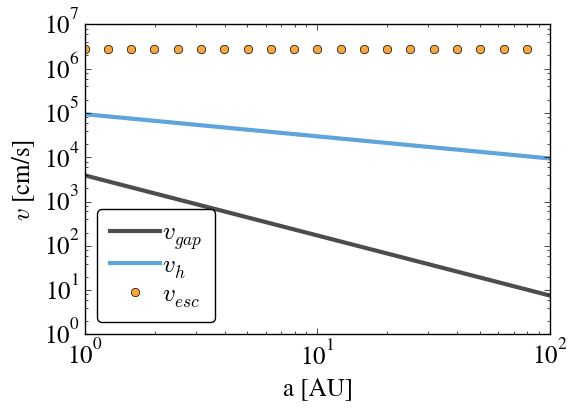

In [27]:
plt.loglog(A,v_gap,label=r'$v_{gap}$')
plt.loglog(A,v_shear,label=r"$v_h$")
# plt.loglog(A,v_r)

plt.loglog(A[::50],np.full(len(A[::50]),v_esc),linestyle=' ',marker='o',label=r"$v_{esc}$")
plt.ylabel(r"$v$ [cm/s]")
plt.xlabel("a [AU]")

plt.gca().legend(loc='best',fancybox=True)

## Let's do some actual solving

In [5]:
#Input parameters
m_star = 1.*fn.m_sun
# m_j = 317.828*fn.m_earth
m_j = 1.899e30
a = 100.
alpha = 1e-4

T = 120*a**(-3./7.)
cs = np.sqrt(fn.k*T/fn.mu)
sig_0 = 1700*a**(-3./2.)
omega = np.sqrt(fn.G*m_star/(a*fn.au)**3.)
h = cs/omega
P = 2*np.pi/omega

#Array of masses
mass = np.logspace(-2,1,num=100)*m_j

#Calculate r_b and r_h from mass array, atmosphere radius is the minimum of the two
r_h = (a*fn.au)*(mass/3./m_star)**(1./3.)
r_b = fn.G*mass/cs**2.
r_acc = np.minimum(r_h,r_b)
h_acc = np.minimum(r_acc,h)

#Calculate the gap clearing from the Fung et al. (2014) results
q = mass/m_star
sig_gap = alpha*(h/(a*fn.au))**5./q**2.*sig_0

#Calculate approach velocity -- for now, ignore velocity through the gap. Is r_acc really
#the correct radius for the shear calculation? Right now essentially using D'Angelo (2008)
v_shear = omega*r_acc

#Calculate dM_dt
rho = sig_gap/2./h
sigma_acc = (2*r_acc)*(2*h_acc)
dM_dt = rho*sigma_acc*v_shear

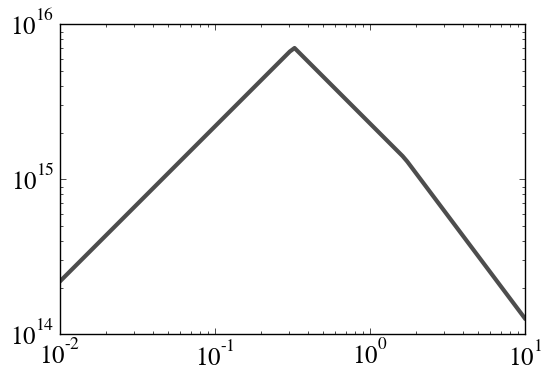

In [6]:
# plt.loglog(mass/m_j,dM_dt/(sig_0*(a*fn.au)**2.*omega))
plt.loglog(mass/m_j,dM_dt)

In [7]:
def dM_dt(M,alpha,a):
    #Input parameters
    m_star = 1.*fn.m_sun
    m_j = 317.828*fn.m_earth

    T = 120.*a**(-3./7.)
    cs = np.sqrt(fn.k*T/fn.mu)
    sig_0 = 1700*a**(-3./2.)
    omega = np.sqrt(fn.G*m_star/(a*fn.au)**3.)
    h = cs/omega
    P = 2*np.pi/omega

    #Mass in cgs
    mass = M*m_j

    #Calculate r_b and r_h from mass array, atmosphere radius is the minimum of the two
    r_h = (a*fn.au)*(mass/3./m_star)**(1./3.)
    r_b = fn.G*mass/cs**2.
    r_acc = np.minimum(r_h,r_b)
    h_acc = np.minimum(r_acc,h)
    
#     print "M = %.3g, rh = %.3g, rb = %.3g, r_acc = %.3g" %(M,r_h,r_b,r_acc)

    #Calculate the gap clearing from the Fung et al. (2014) results
    q = mass/m_star
    sig_gap = alpha*(h/(a*fn.au))**5./q**2.*sig_0

    #Calculate approach velocity -- for now, ignore velocity through the gap. Is r_acc really
    #the correct radius for the shear calculation? Right now essentially using D'Angelo (2008)
    v_shear = omega*r_acc

    #Calculate dM_dt
    rho = sig_gap/2./h
    sigma_acc = (2*r_acc)*(2*h_acc)
    
    return rho*sigma_acc*v_shear

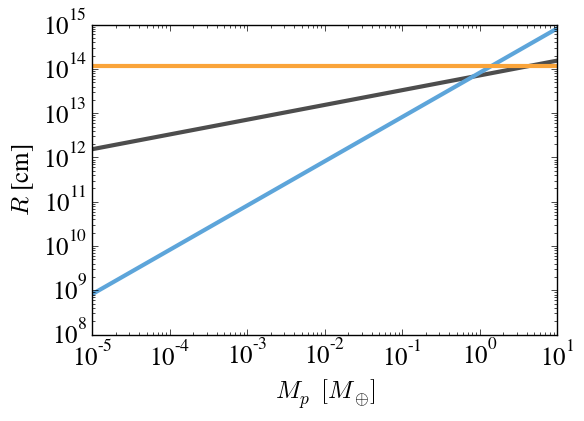

In [138]:
mass_arr = np.logspace(-5,1,num=1000)

mstar = 1.*fn.m_sun
a = 70.*fn.au
T = 270*(a/fn.au)**(-3./7.)
cs = np.sqrt(fn.k*T/fn.mu)
omega = np.sqrt(fn.G*mstar/a**3.)
H = cs/omega

rh_arr = a*(mass_arr*m_j/3./mstar)**(1./3.)
rb_arr = fn.G*mass_arr*m_j/cs**2.

plt.loglog(mass_arr,rh_arr)
plt.loglog(mass_arr,rb_arr)
plt.loglog(mass_arr,np.full(len(mass_arr),H))

plt.xlabel(r'$M_p \, [M_\oplus]$')
plt.ylabel(r'$R$ [cm]')

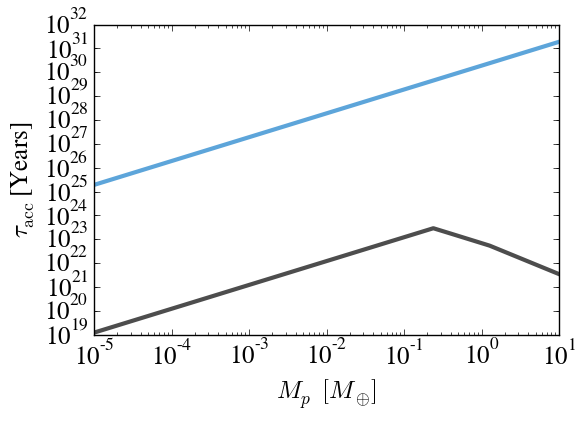

In [87]:
mass_arr = np.logspace(-5,1,num=1000)
mdot_arr = np.zeros(len(mass_arr))

for i,M in enumerate(mass_arr):
    mdot_arr[i] = dM_dt(M,1e-4,70.)

plt.loglog(mass_arr,mdot_arr/fn.sec_to_years)
plt.loglog(mass_arr,mass_arr*m_j)
# plt.loglog(mass_arr,np.full(len(mass_arr),2.5e6))

plt.xlabel(r'$M_p \, [M_\oplus]$')
plt.ylabel(r'$\tau_{\rm{acc}}$ [Years]')

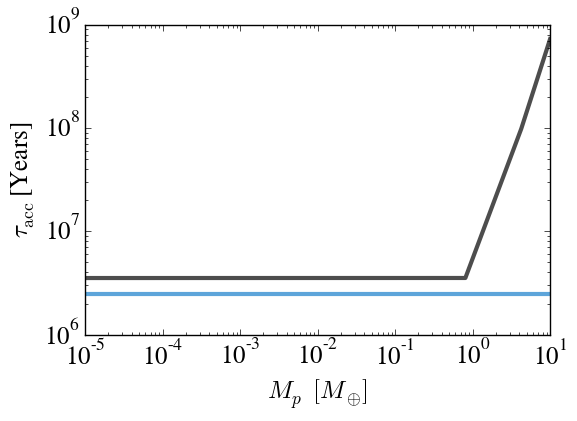

In [139]:
mass_arr = np.logspace(-5,1,num=1000)
mdot_arr = np.zeros(len(mass_arr))

for i,M in enumerate(mass_arr):
    mdot_arr[i] = dM_dt(M,1e-4,70.)

plt.loglog(mass_arr,mass_arr*m_j/mdot_arr*fn.sec_to_years)
plt.loglog(mass_arr,np.full(len(mass_arr),2.5e6))

plt.xlabel(r'$M_p \, [M_\oplus]$')
plt.ylabel(r'$\tau_{\rm{acc}}$ [Years]')

In [5]:
def m_gap(M,alpha,a):
    m_j = 317.828*fn.m_earth
    t_acc = 2.5e6/fn.sec_to_years
    return (M*m_j)/dM_dt(M,alpha,a) - t_acc

In [8]:
def alpha_crit(a):
    #Input parameters
    m_star = 1.*fn.m_sun
    m_j = 317.828*fn.m_earth

    T = 120.*a**(-3./7.)
    cs = np.sqrt(fn.k*T/fn.mu)
    sig_0 = 1700*a**(-3./2.)
    omega = np.sqrt(fn.G*m_star/(a*fn.au)**3.)
    h = cs/omega
    
    tau_acc = 2.5e6/fn.sec_to_years
    
    r = a*fn.au
    
    a_crit = 0.5*m_star/sig_0/r**2.*omega**(-1.)*(h/r)**2./tau_acc

    return a_crit

In [9]:
alpha_arr = [1e-4,1e-3,1e-2]
a_arr = np.linspace(1,100,num=1000)
m_open = np.zeros((len(alpha_arr),len(a_arr)))
m_open_ther = np.zeros((len(alpha_arr),len(a_arr)))

for i,alpha in enumerate(alpha_arr):
    for j,a in enumerate(a_arr):
        a_crit = alpha_crit(a)
        if alpha < a_crit:
            m_open[i,j] = 0
        else:
            guess = 8.95477*a*(9./49.)*alpha**(3./7.)
            m_open[i,j] = fsolve(m_gap,guess,args=(alpha,a))

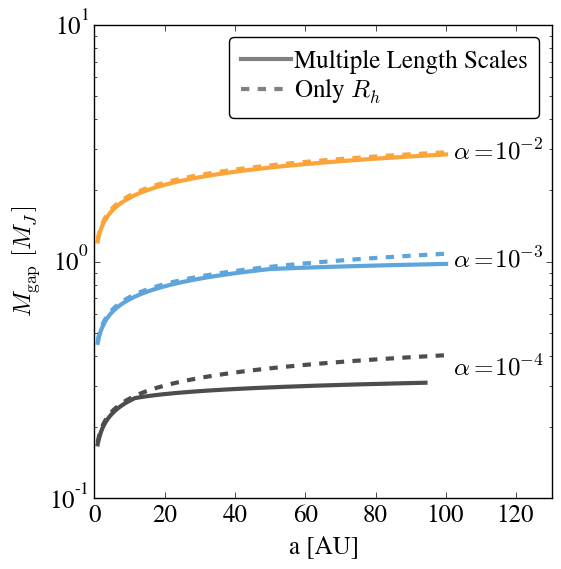

In [10]:
fig = plt.figure(1,figsize=(6,6,))

for i in range(len(alpha_arr)):
    line, = plt.semilogy(a_arr,m_open[i])
    
    m_open_ther[i] = 8.95477*a_arr**(9./49.)*alpha_arr[i]**(3./7.)
    plt.semilogy(a_arr,m_open_ther[i],color=line.get_color(),linestyle='dashed')
    
plt.xlabel('a [AU]')
plt.ylabel(r'$M_{\rm{gap}}\,[M_J]$')

plt.gca().autoscale(False)
plt.plot(-100,-100,color='gray',label='Multiple Length Scales')
plt.plot(-100,-100,color='gray',label=r'Only $R_h$',linestyle='dashed')
plt.gca().legend(loc='best',fancybox=True)

plt.xlim(0,130)
plt.gca().text(102,2.7,r'$\alpha = 10^{-2}$')
plt.gca().text(102,0.95,r'$\alpha = 10^{-3}$')
plt.gca().text(102,0.33,r'$\alpha = 10^{-4}$')

plt.tight_layout()


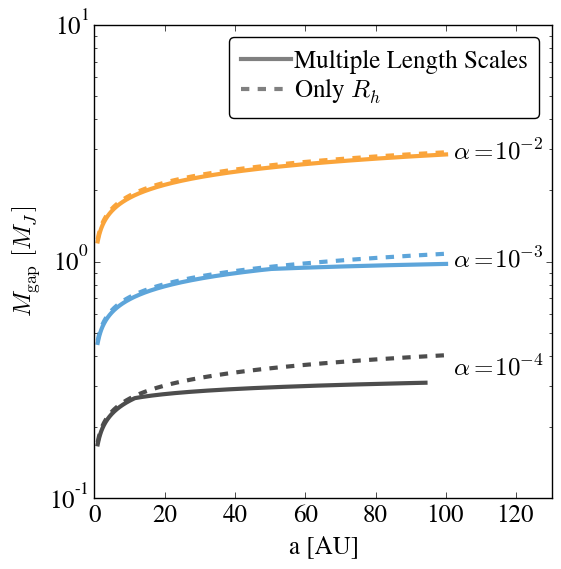

In [11]:
fig = plt.figure(1,figsize=(6,6,))

for i in range(len(alpha_arr)):
    line, = plt.semilogy(a_arr,m_open[i])
    
    T = 120.*a_arr**(-3./7.)
    sig_0 = 1700*a_arr**(-3./2.)
    
    m_open_ther[i] = 1.50267*(a_arr/70.)**(9./7.)*(T/40.)**(15./14.)*(sig_0/3)**(3./7.)*(alpha_arr[i]/4e-4)**(3./7.)
    plt.semilogy(a_arr,m_open_ther[i],color=line.get_color(),linestyle='dashed')
    
plt.xlabel('a [AU]')
plt.ylabel(r'$M_{\rm{gap}}\,[M_J]$')

plt.gca().autoscale(False)
plt.plot(-100,-100,color='gray',label='Multiple Length Scales')
plt.plot(-100,-100,color='gray',label=r'Only $R_h$',linestyle='dashed')
plt.gca().legend(loc='best',fancybox=True)

plt.xlim(0,130)
plt.gca().text(102,2.7,r'$\alpha = 10^{-2}$')
plt.gca().text(102,0.95,r'$\alpha = 10^{-3}$')
plt.gca().text(102,0.33,r'$\alpha = 10^{-4}$')

plt.tight_layout()


In [191]:
fig.savefig('../gap_opening/gap_open_ec.pdf')

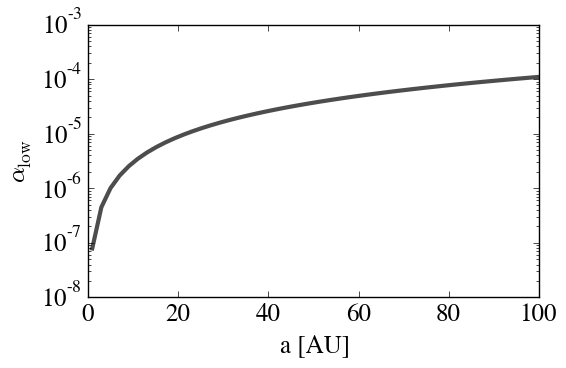

In [13]:
fig = plt.figure(1)

a_arr = np.linspace(1,100)
a_crit_arr = np.zeros(len(a_arr))

for i,a in enumerate(a_arr):
    a_crit_arr[i] = alpha_crit(a)
    
plt.semilogy(a_arr,a_crit_arr)

plt.xlabel('a [AU]')
plt.ylabel(r'$\alpha_{\rm{low}}$')
plt.tight_layout()

In [14]:
fig.savefig('../gap_opening/alpha_low_ex.pdf')

# Check Plot from Lissauer et al. (2009)

In [3]:
#Input parameters
q = np.logspace(-6,-2,num=1000)
m_star = 1.*fn.m_sun
m_j = 317.828*fn.m_earth

a = 5.2
T = 115.
alpha = 4e-3
cs = np.sqrt(fn.k*T/fn.mu)
sig_0 = 1700*a**(-3./2.)
omega = np.sqrt(fn.G*m_star/(a*fn.au)**3.)
h = cs/omega
P = 2*np.pi/omega

#Mass in cgs
mass = q*m_star

#Calculate r_b and r_h from mass array, atmosphere radius is the minimum of the two
r_h = (a*fn.au)*(mass/3./m_star)**(1./3.)
r_b = fn.G*mass/cs**2.
r_acc = np.minimum(r_h,r_b)
h_acc = np.minimum(r_acc,h)

#     print "M = %.3g, rh = %.3g, rb = %.3g, r_acc = %.3g" %(M,r_h,r_b,r_acc)

#Calculate the gap clearing from the Fung et al. (2014) results
# q = mass/m_star
sig_gap = np.minimum(alpha*(h/(a*fn.au))**5./q**2.*sig_0,sig_0)

#Calculate approach velocity -- for now, ignore velocity through the gap. Is r_acc really
#the correct radius for the shear calculation? Right now essentially using D'Angelo and Lublow (2008)
v_shear = 1.5*omega*r_acc

#Calculate dM_dt
rho = sig_gap/2./h
sigma_acc = (2*r_acc)*(2*h_acc)

M_dot = rho*sigma_acc*v_shear

(5e-05, 0.01)

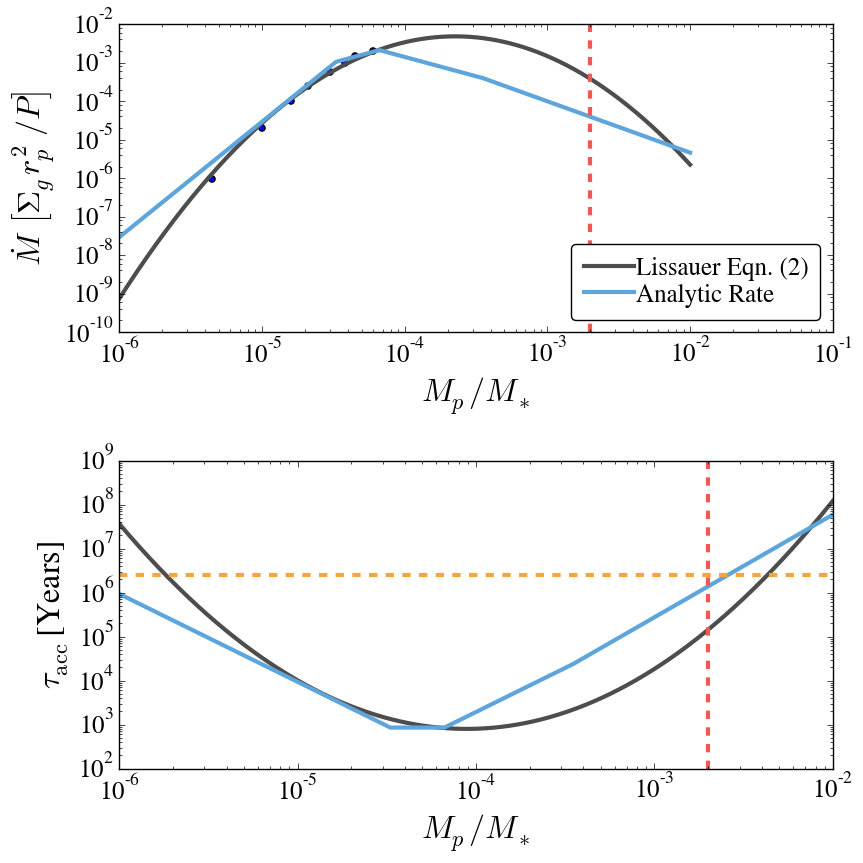

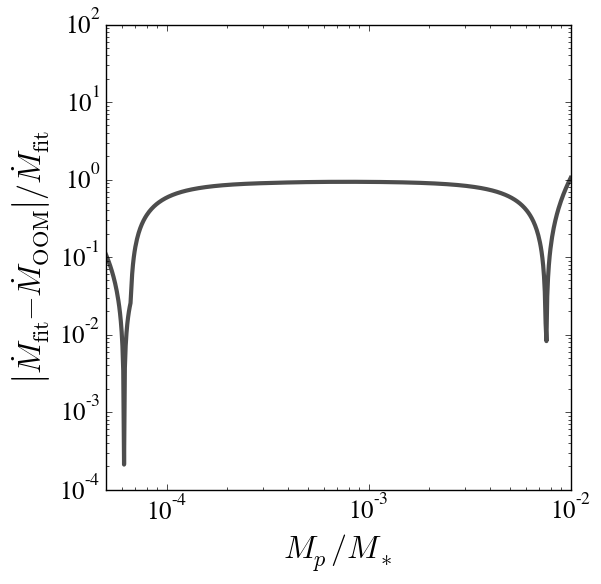

In [33]:
c0 = -18.67
c1 = -8.97
c2 = -1.23

scale_fac = sig_0*(a*fn.au)**2./P

q = np.logspace(-6,-2,num=1000)
M_dot_fit = 10**(c0 + c1*np.log10(q) + c2*np.log10(q)**2.)

liss_4e3 = [(4.5e-6,9.5e-7),(1e-5,2e-5),(1.6e-5,1e-4),(2.1e-5,2.5e-4),(3e-5,5.75e-4),(3.8e-5,1e-3),(4.5e-5,1.5e-3),\
           (6e-5,2e-3)]
x_arr = [x for x,y in liss_4e3]
y_arr = [y for x,y in liss_4e3]

fig = plt.figure(1,figsize=(9,9))

plt.subplot(211)

plt.loglog(q,M_dot_fit,label='Lissauer Eqn. (2)')
plt.scatter(x_arr,y_arr)
plt.loglog(q,M_dot/scale_fac,label='Analytic Rate')
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\dot{M} \, \left[\Sigma_g r_p^2/P \right]$',fontsize=23)
plt.axvline(x=2e-3,color=colors[-1],linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

plt.subplot(212)

plt.loglog(q,(q*m_star)/(M_dot_fit*scale_fac)/3.15e7)
plt.loglog(q,(q*m_star)/M_dot/3.15e7)
plt.loglog(q,np.full(len(q),2.5e6),linestyle='dashed')
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\tau_{\rm{acc}}$ [Years]',fontsize=23)
plt.axvline(x=2e-3,color=colors[-1],linestyle='dashed')

plt.tight_layout()


plt.figure(2,figsize=(6,6))

err = np.abs((M_dot_fit - (M_dot/scale_fac)))/M_dot_fit
plt.loglog(q,err)
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\left|\dot{M}_{\rm{fit}} - \dot{M}_{\rm{OOM}}\right|/\dot{M}_{\rm{fit}}$',fontsize=23)
plt.xlim(5e-5,1e-2)


In [25]:
x_arr = [x for x,y in liss_4e3]
y_arr = [y for x,y in liss_4e3]
print x_arr,y_arr

[4.5e-06, 1e-05] [9.5e-07, 2e-05]


In [4]:
fig.savefig('../../Paper_Prep/Gas_Giant_Gaps/ec_writeup/lissauer_comp.pdf')

In [8]:
#Input parameters
q = np.logspace(-6,-2,num=1000)
m_star = 1.*fn.m_sun
m_j = 317.828*fn.m_earth

a = 5.2
T = 115.
alpha = 4e-3
cs = np.sqrt(fn.k*T/fn.mu)
sig_0 = 1700*a**(-3./2.)
omega = np.sqrt(fn.G*m_star/(a*fn.au)**3.)
h = cs/omega
P = 2*np.pi/omega

#Mass in cgs
mass = q*m_star

#Calculate r_b and r_h from mass array, atmosphere radius is the minimum of the two
r_h = (a*fn.au)*(mass/3./m_star)**(1./3.)
r_b = fn.G*mass/cs**2.
r_acc = np.zeros(len(r_h))
v_enc = np.zeros(len(r_h))
# r_acc = np.minimum(r_h,r_b)

for i in range(len(r_h)):
    if r_h[i] < r_b[i]:
        r_acc[i] = r_h[i]
        v_enc[i] = 1.5*omega*r_h[i]
    else:
        r_acc[i] = r_b[i]
        v_enc[i] = cs
    
h_acc = np.minimum(r_acc,h)

#     print "M = %.3g, rh = %.3g, rb = %.3g, r_acc = %.3g" %(M,r_h,r_b,r_acc)

#Calculate the gap clearing from the Fung et al. (2014) results
# q = mass/m_star
sig_gap = np.minimum(alpha*(h/(a*fn.au))**5./q**2.*sig_0,sig_0)

#Calculate approach velocity -- for now, ignore velocity through the gap. Is r_acc really
#the correct radius for the shear calculation? Right now essentially using D'Angelo and Lublow (2008)
v_shear = 1.5*omega*r_acc

#Calculate dM_dt
rho = sig_gap/2./h
sigma_acc = (2*r_acc)*(2*h_acc)

M_dot = rho*sigma_acc*v_enc

(5e-05, 0.01)

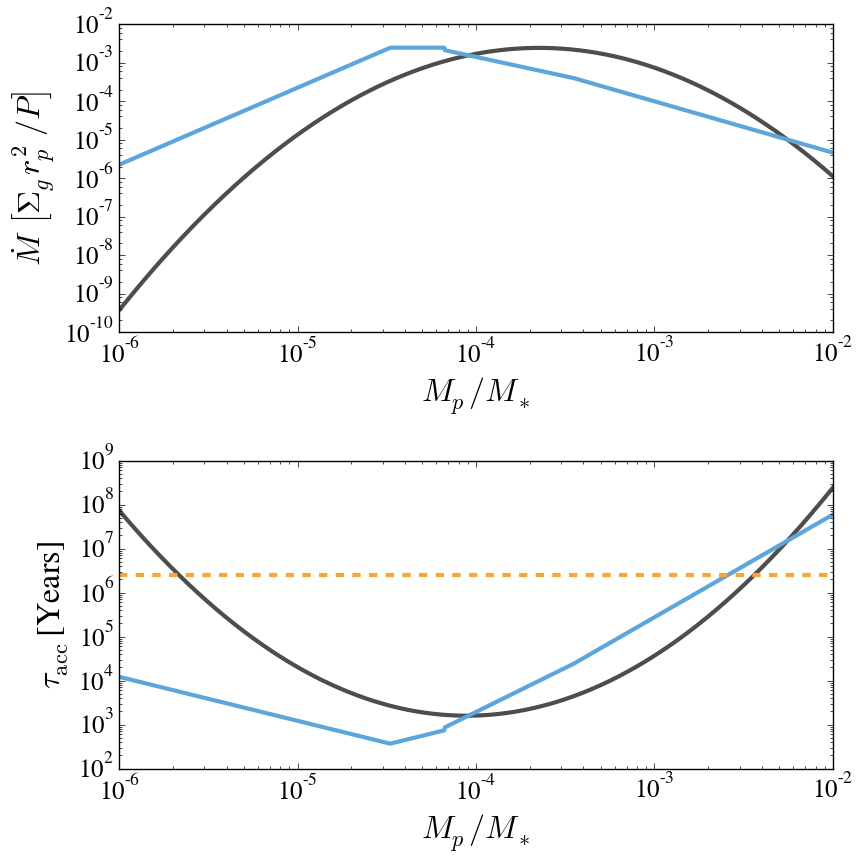

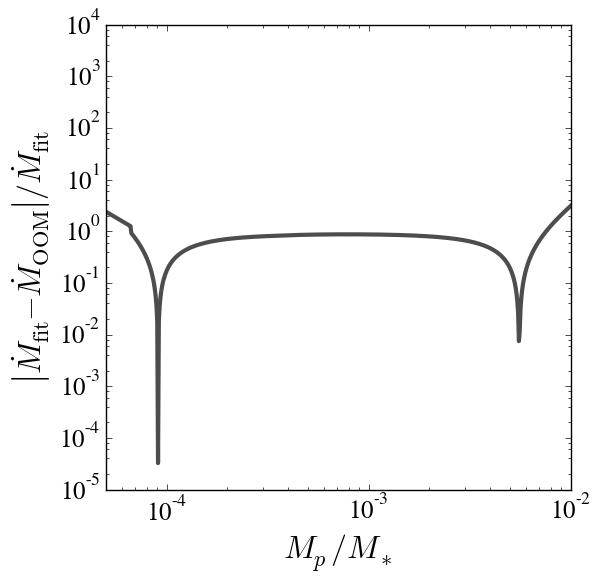

In [9]:
c0 = -18.97
c1 = -8.97
c2 = -1.23

scale_fac = sig_0*(a*fn.au)**2./P

q = np.logspace(-6,-2,num=1000)
M_dot_fit = 10**(c0 + c1*np.log10(q) + c2*np.log10(q)**2.)

plt.figure(1,figsize=(9,9))

plt.subplot(211)

plt.loglog(q,M_dot_fit)
plt.loglog(q,M_dot/scale_fac)
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\dot{M} \, \left[\Sigma_g r_p^2/P \right]$',fontsize=23)

plt.subplot(212)

plt.loglog(q,(q*m_star)/(M_dot_fit*scale_fac)/3.15e7)
plt.loglog(q,(q*m_star)/M_dot/3.15e7)
plt.loglog(q,np.full(len(q),2.5e6),linestyle='dashed')
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\tau_{\rm{acc}}$ [Years]',fontsize=23)

plt.tight_layout()

plt.figure(2,figsize=(6,6))

err = np.abs((M_dot_fit - (M_dot/scale_fac)))/M_dot_fit
plt.loglog(q,err)
plt.xlabel(r'$M_p/M_*$',fontsize=23)
plt.ylabel(r'$\left|\dot{M}_{\rm{fit}} - \dot{M}_{\rm{OOM}}\right|/\dot{M}_{\rm{fit}}$',fontsize=23)
plt.xlim(5e-5,1e-2)

# Random Cell Testing Figure 12 stuff from Ormel (2013)

From the definition of $R_{WS}$ for large planetary masses ($M_p \gg m$) we have:
\begin{align}
R_{WS} &= \sqrt{\frac{G (M_p+m)}{\Delta a_{WS}}}\\
&\approx \sqrt{\frac{G M_p m}{F_D(m)}} \\
&= \sqrt{\frac{G M_p t_s}{v_{gas}}}
\end{align}
In Ormel (2013), the scale height of the disk is used as the unit of length, and the Bondi radius is used as a dimensionless mass (c.f. Equation (23)):
\begin{align}
m \equiv R_b/H = q_p/h^3
\end{align}
where $q_p \equiv M_p/M_*$, and $h\equiv H/a$. In dimensionless units the WISH radius is given by:

\begin{align}
\frac{R_{ws}}{H} &= \sqrt{\frac{G M_p t_s}{v_{gas}}}/(c_s/\Omega)\\
&=\sqrt{\frac{G M_p t_s c_s \Omega}{v_{gas}}} \frac{\Omega^{1/2}}{c_s^{3/2}}\\
&=\sqrt{\frac{M_p \tau_s }{\mathcal{M}_{hw}}}\sqrt{\frac{\Omega^2 a^3}{M_*}} \frac{\Omega^{1/2}}{c_s^{3/2}}\\
&=\sqrt{\frac{\tau_s }{\mathcal{M}_{hw}}} \sqrt{\frac{q_p}{h^3}}\\
&=\sqrt{\frac{m \tau_s}{\mathcal{M}_{hw}}}
\end{align}

where $m \equiv R_b/H$. Thus

\begin{align}
\frac{R_{ws}}{R_b} = \sqrt{\frac{\tau_s}{m \mathcal{M}_{hw}}}
\end{align}


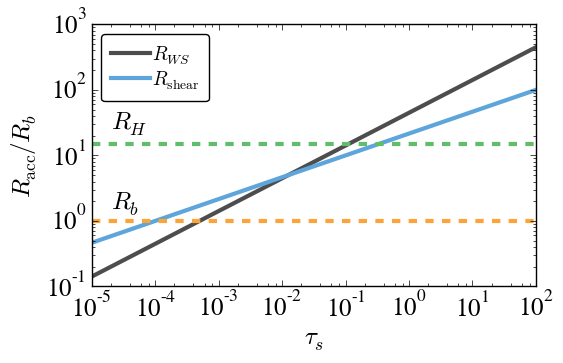

In [7]:
M_hw = 0.05
m = 1e-2

tau_s = np.logspace(-5,2)
# plt.loglog(tau_s,np.sqrt(m*tau_s/(M_hw**3.)))

fig = plt.figure(1,figsize=(6,4))

plt.loglog(tau_s,np.sqrt(tau_s/(m*M_hw)),label=r'$R_{WS}$')
plt.loglog(tau_s,(tau_s)**(1./3.)*(1./m**2.)**(1./3.),label=r'$R_{\rm{shear}}$')
# plt.loglog(tau_s,(m*M_hw/tau_s)**(1./4.))
plt.loglog(tau_s,np.full(len(tau_s),1),linestyle='dashed')
plt.loglog(tau_s,np.full(len(tau_s),(1./3./m**2.)**(1./3.)),linestyle='dashed')
plt.text(2e-5,25,r'$R_H$')
plt.text(2e-5,1.5,r'$R_b$')


plt.ylabel(r'$R_{\rm{acc}}/R_b$')
plt.xlabel(r'$\tau_s$')
plt.gca().legend(loc='best',fontsize=14,fancybox=True)
plt.tight_layout()

fig.savefig('../../Paper_Prep/Gas_Giant_Gaps/ec_writeup/rws_rb_rshear.pdf')

In [4]:
M_hw*m

0.0005

## Test with real disk parameters

[1e-05, 100.0, 0.1, 1000.0]

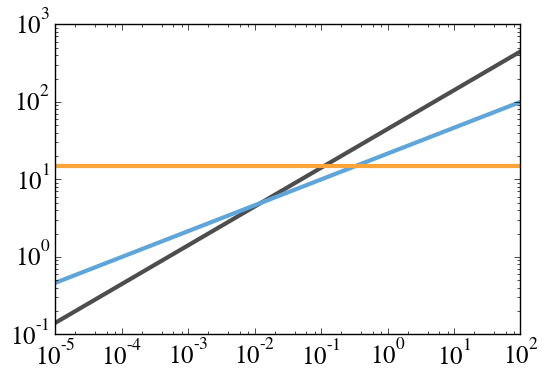

In [7]:
a_au = 84.5434 #Solution to eta*v_k/c_s = M_{hw} = 0.05
m_core = 3.32848 #Solution to R_b/H = m = 1e-2 at this semi-major axis

rad_arr = np.logspace(-5,5,num=1000)
st_arr = np.zeros(len(rad_arr))
r_ws_arr = np.zeros(len(rad_arr))
r_shear_arr = np.zeros(len(rad_arr))

for i,r in enumerate(rad_arr):
    time,st_arr[i] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=1e-100,r=r,out='st')
    time,r_ws_arr[i],h_r,b_r,r_shear_arr[i] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=1e-100,r=r,out='len')
    
plt.loglog(st_arr,r_ws_arr/b_r)
plt.loglog(st_arr,r_shear_arr/b_r)
plt.loglog(st_arr,np.full(len(rad_arr),h_r/b_r))

plt.axis([1e-5,1e2,1e-1,1e3])

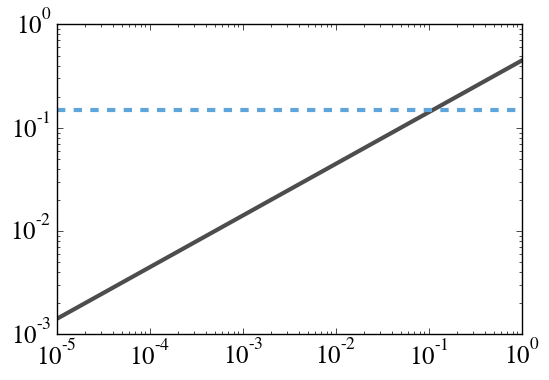

In [6]:
M_hw = 0.05
m = 1e-2

tau_s = np.logspace(-5,0)
plt.loglog(tau_s,np.sqrt(m*tau_s/(M_hw)))
plt.loglog(tau_s,np.full(len(tau_s),(m/3.)**(1./3.)),linestyle='dashed')

# Check (27) for Ormel and Klahr (2010)

In [2]:
zeta_w_arr = [1e-2,1e-1,1.0,10.]

N_st = 100
b_arr = np.zeros((len(zeta_w_arr),N_st))

for i,zeta_w in enumerate(zeta_w_arr):

    st_arr = np.logspace(-4,1,num=N_st)

    for j,st in enumerate(st_arr):
        b_eqn = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8*st
        b_arr[i,j] = opt.fsolve(b_eqn,np.sqrt(12.*st/zeta_w))

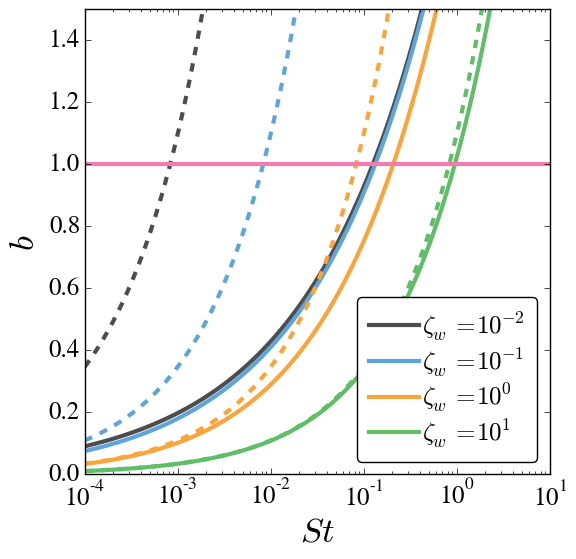

In [4]:
fig = plt.figure(1,figsize=(6,6))

for i,zeta_w in enumerate(zeta_w_arr):
    line, = plt.semilogx(st_arr,b_arr[i],label=r"$\zeta_w = 10^{%.3g}$" %np.log10(zeta_w))
    plt.semilogx(st_arr,np.sqrt(12.*st_arr/zeta_w),linestyle='dashed',color=line.get_color())
                 
plt.semilogx(st_arr,np.full(len(st_arr),1))

plt.xlabel(r'$St$',fontsize=25)
plt.ylabel(r'$b$',fontsize=25)
plt.ylim(0,1.5)

plt.gca().legend(loc='best',fancybox=True)

In [57]:
fig.savefig('../../Paper_Prep/Gas_Giant_Gaps/ec_writeup/OK10_b_loglin.pdf')

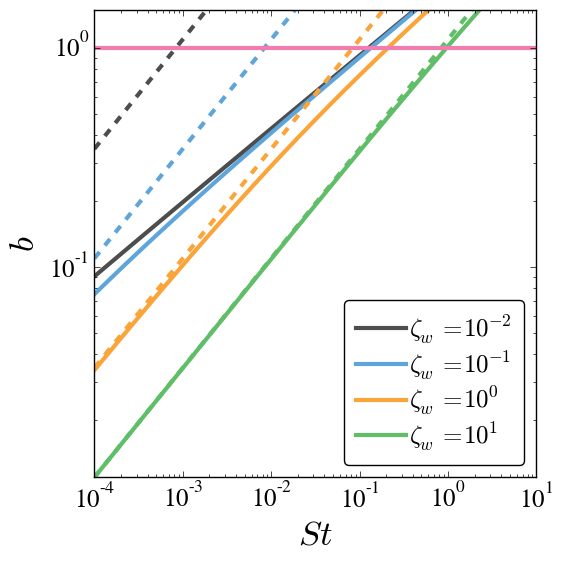

In [5]:
fig = plt.figure(1,figsize=(6,6))

for i,zeta_w in enumerate(zeta_w_arr):
    line, = plt.loglog(st_arr,b_arr[i],label=r"$\zeta_w = 10^{%.3g}$" %np.log10(zeta_w))
    plt.loglog(st_arr,np.sqrt(12.*st_arr/zeta_w),linestyle='dashed',color=line.get_color())
plt.semilogx(st_arr,np.full(len(st_arr),1))

plt.xlabel(r'$St$',fontsize=25)
plt.ylabel(r'$b$',fontsize=25)

plt.gca().legend(loc='best',fancybox=True)
plt.ylim(0,1.5)

plt.tight_layout()

In [61]:
fig.savefig('../../Paper_Prep/Gas_Giant_Gaps/ec_writeup/OK10_b_loglog.pdf')